In [43]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go
import plotly.express as px

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Convert categorical 'sex' column to numeric
df['sex'] = df['sex'].map({'male': 0, 'female': 1})


In [44]:
# Define a new continuous color palette directly from Viridis without using white
colors = plt.cm.viridis(np.linspace(0, 0.8, 256))  # Avoid the lightest shades
continuous_cmap = LinearSegmentedColormap.from_list("custom_viridis", colors)


/tmp/ipykernel_5929/242298501.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




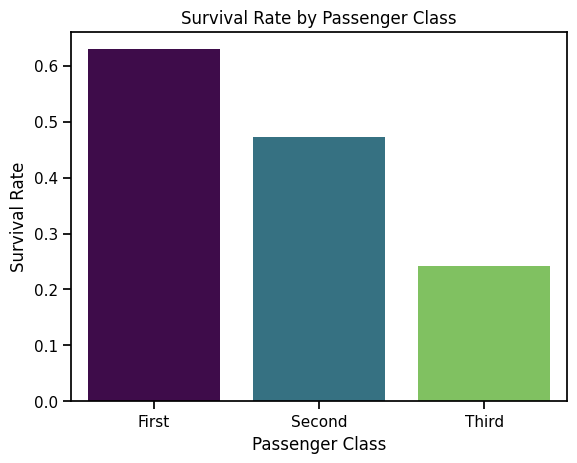

In [45]:
# Convert the colormap to a list of colors
palette_colors = [continuous_cmap(i) for i in np.linspace(0, 1, df['class'].nunique())]
sns.set_context('notebook')
# Use the list of colors in the barplot
sns.barplot(x='class', y='survived', data=df, errorbar=None, palette=palette_colors)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


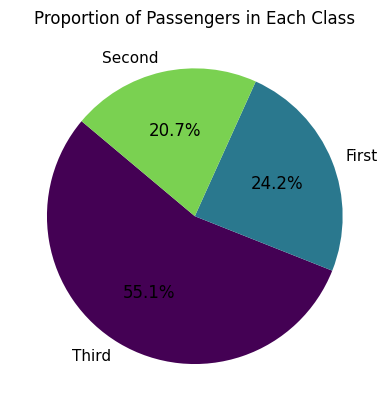

In [46]:
# Generate colors from the continuous_cmap
colors = continuous_cmap(np.linspace(0, 1, df['class'].nunique()))

# Pie chart for proportion of passengers in each class using continuous_cmap
df['class'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title('Proportion of Passengers in Each Class')
plt.ylabel('')  # Remove the y-axis label for clarity
plt.show()


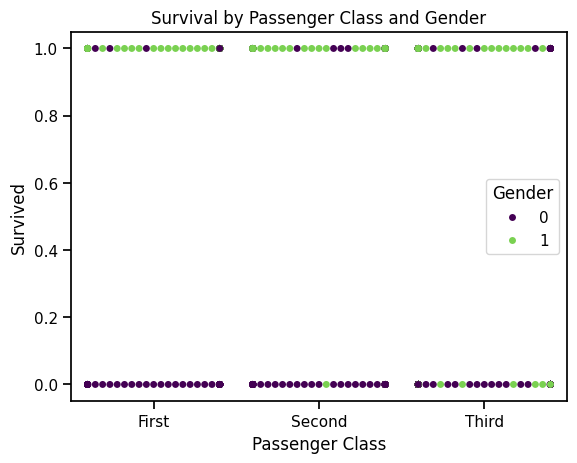

In [47]:
# Generate colors from the continuous_cmap for the number of unique genders
unique_genders = df['sex'].nunique()
colors = continuous_cmap(np.linspace(0, 1, unique_genders))

# Swarm plot for survival by passenger class using continuous_cmap
sns.swarmplot(x='class', y='survived', data=df, hue='sex', palette=colors)
plt.title('Survival by Passenger Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survived')
plt.legend(title='Gender')
plt.show()


/tmp/ipykernel_5929/635781837.py:2: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



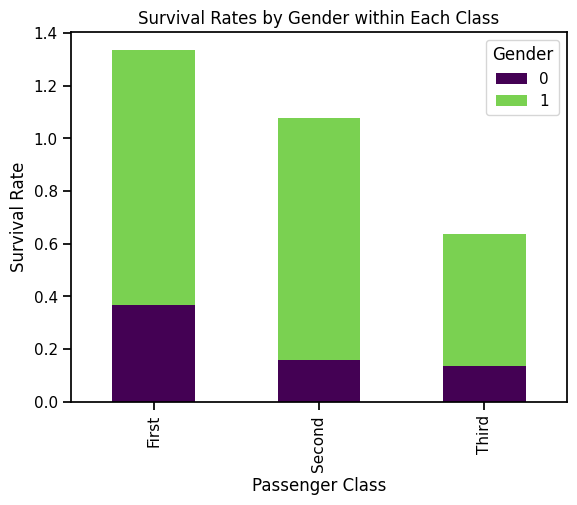

In [48]:
# Create a pivot table for survival by class and gender
pivot_table = df.pivot_table(values='survived', index='class', columns='sex', aggfunc='mean')

# Convert the continuous palette to a list for seaborn compatibility
unique_genders = df['sex'].nunique()
colors = list(continuous_cmap(np.linspace(0, 1, unique_genders)))

# Stacked bar chart with continuous color palette
pivot_table.plot(kind='bar', stacked=True, color=colors)
plt.title('Survival Rates by Gender within Each Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Gender')
plt.show()


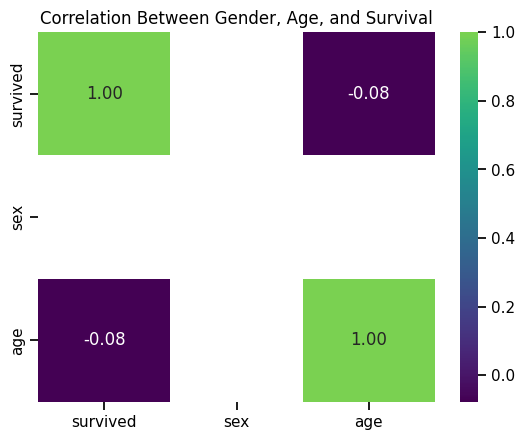

In [49]:
# Create a correlation heatmap using age, gender (encoded), and survival
df_encoded = df.copy()
df_encoded['sex'] = df_encoded['sex'].map({'male': 0, 'female': 1})  # Encode gender

# Select relevant columns for correlation
corr_data = df_encoded[['survived', 'sex', 'age']].corr()


# Generate heatmap with the continuous color palette
sns.heatmap(corr_data, annot=True, cmap=continuous_cmap, fmt='.2f')
plt.title('Correlation Between Gender, Age, and Survival')
plt.show()

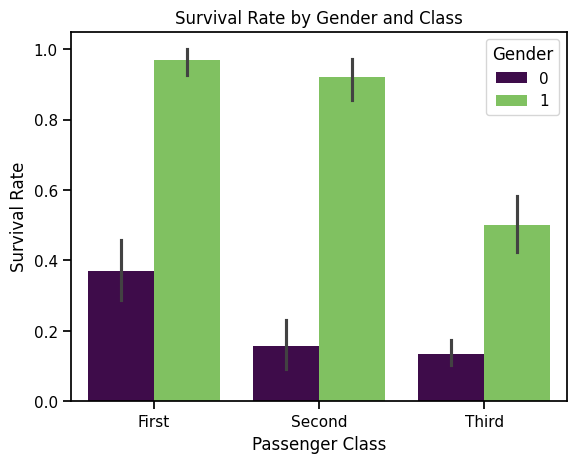

In [50]:
# Generate a custom palette for the 'hue' categories (gender in this case)
# Since there are 2 genders, extract 2 distinct colors from the custom cmap
palette_colors = [continuous_cmap(i) for i in np.linspace(0, 1, df['sex'].nunique())]

# Grouped bar chart using the custom continuous colormap
sns.barplot(x='class', y='survived', hue='sex', data=df, palette=palette_colors)
plt.title('Survival Rate by Gender and Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Gender')
plt.show()

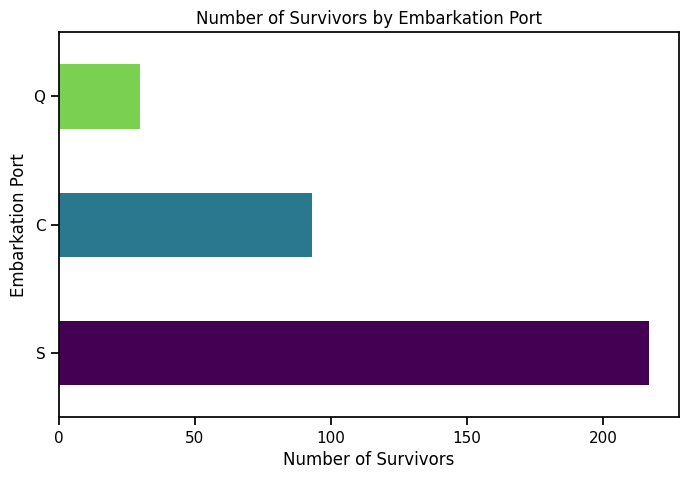

In [51]:

# Generate color gradient based on the number of survivors
port_survival = df[df['survived'] == 1]['embarked'].value_counts()
color_gradient = [continuous_cmap(i) for i in np.linspace(0, 1, len(port_survival))]

# Plot horizontal bar chart with custom colors
plt.figure(figsize=(8, 5))
port_survival.plot(kind='barh', color=color_gradient)
plt.title('Number of Survivors by Embarkation Port')
plt.xlabel('Number of Survivors')
plt.ylabel('Embarkation Port')
plt.show()


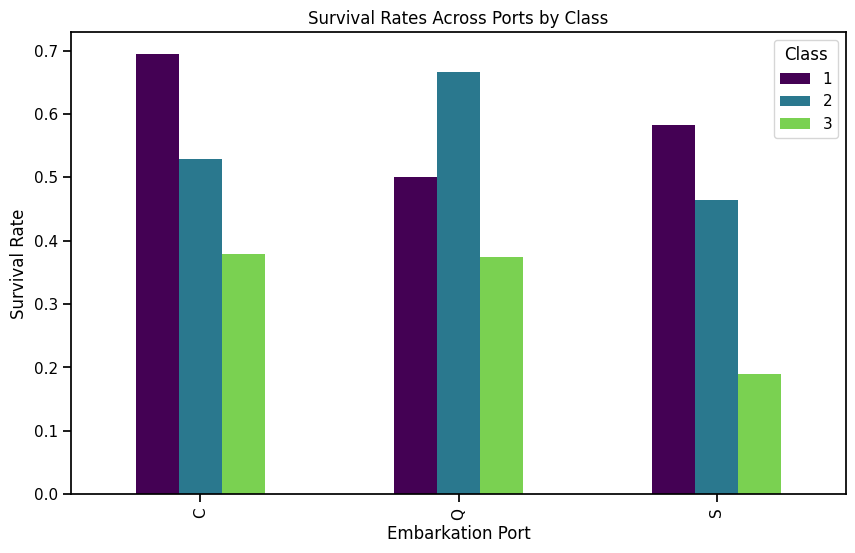

In [52]:
# Calculate survival rates grouped by port and class
class_port_survival = df.groupby(['embarked', 'pclass'])['survived'].mean().unstack()

# Generate color gradient for each class
color_gradient = [continuous_cmap(i) for i in np.linspace(0, 1, class_port_survival.shape[1])]

# Plot grouped bar chart with custom colors
class_port_survival.plot(kind='bar', figsize=(10, 6), color=color_gradient)
plt.title('Survival Rates Across Ports by Class')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.legend(title='Class')
plt.show()


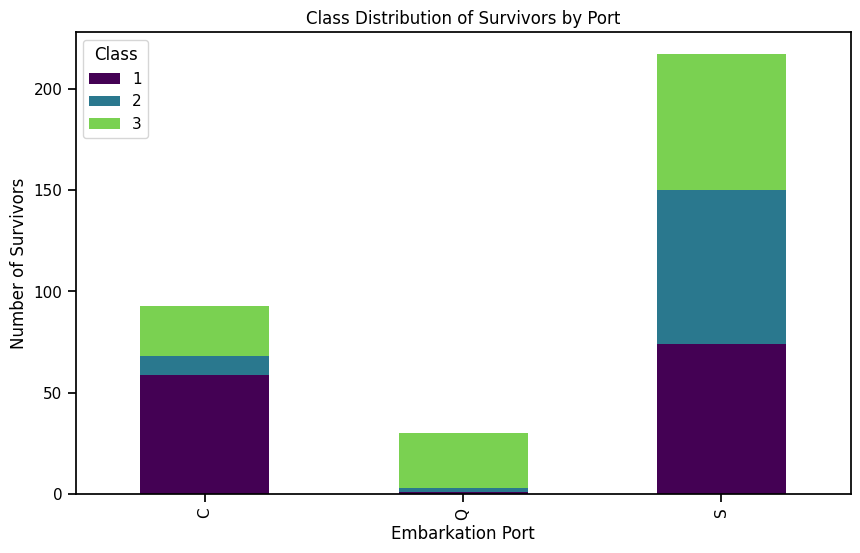

In [53]:

# Calculate class distribution of survivors by embarkation port
class_distribution = df[df['survived'] == 1].groupby(['embarked', 'pclass']).size().unstack()

# Generate color gradient for each class
color_gradient = [continuous_cmap(i) for i in np.linspace(0, 1, class_distribution.shape[1])]

# Plot stacked bar chart with custom colors
class_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=color_gradient)
plt.title('Class Distribution of Survivors by Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Number of Survivors')
plt.legend(title='Class')
plt.show()


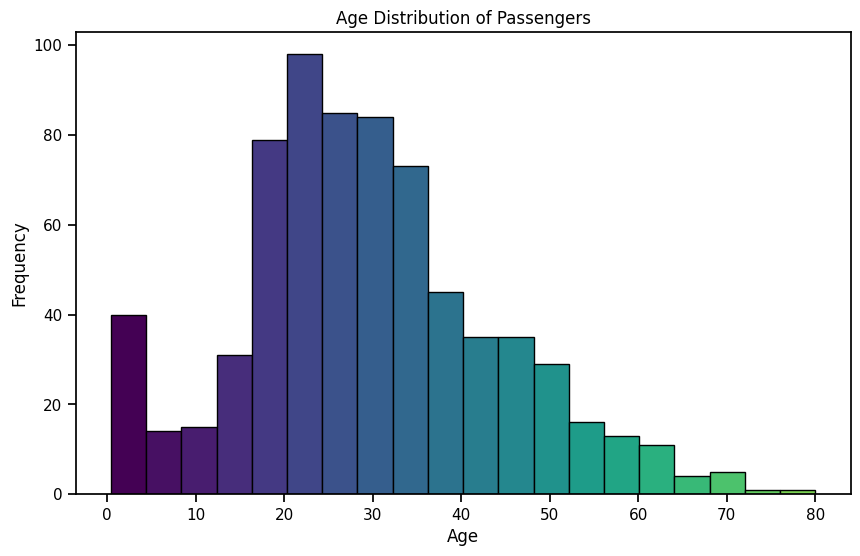

In [54]:

# Generate gradient colors for the histogram bins
n_bins = 20
bin_colors = [continuous_cmap(i) for i in np.linspace(0, 1, n_bins)]

# Plot histogram with custom colors
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['age'].dropna(), bins=n_bins, edgecolor='black')

# Apply gradient colors to each bin
for patch, color in zip(patches, bin_colors):
    patch.set_facecolor(color)

plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


/tmp/ipykernel_5929/2795133547.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



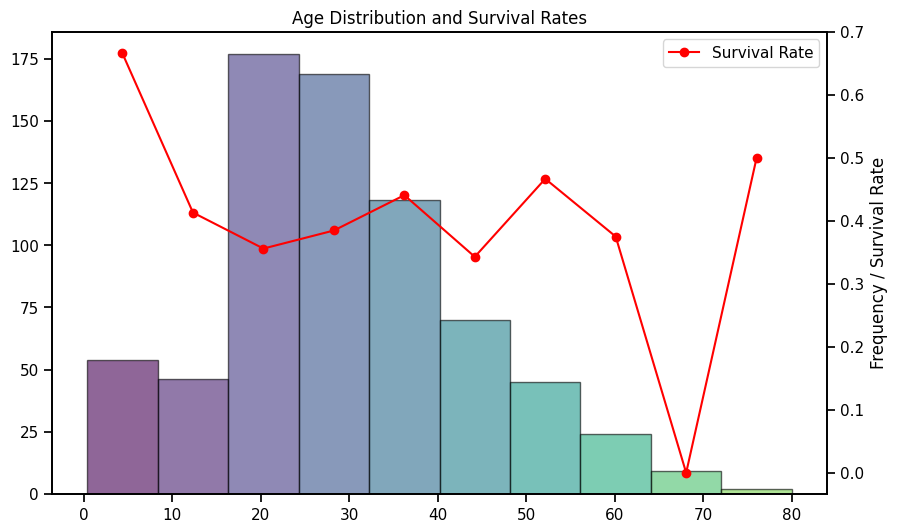

In [55]:

# Create age bins and calculate survival rates
age_bins = pd.cut(df['age'], bins=10)
survival_rates = df.groupby(age_bins)['survived'].mean()

# Prepare colors for histogram bins
n_bins = 10
bin_colors = [continuous_cmap(i) for i in np.linspace(0, 1, n_bins)]

# Plotting
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['age'].dropna(), bins=n_bins, edgecolor='black', alpha=0.6, label='Age Distribution')

# Apply gradient colors to the histogram
for patch, color in zip(patches, bin_colors):
    patch.set_facecolor(color)

# Plot survival rates on the secondary y-axis
plt.twinx()
plt.plot(survival_rates.index.categories.mid, survival_rates.values, color='red', marker='o', label='Survival Rate')

# Labels and title
plt.title('Age Distribution and Survival Rates')
plt.xlabel('Age Groups')
plt.ylabel('Frequency / Survival Rate')
plt.legend(loc='upper right')
plt.show()


/tmp/ipykernel_5929/2548779845.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




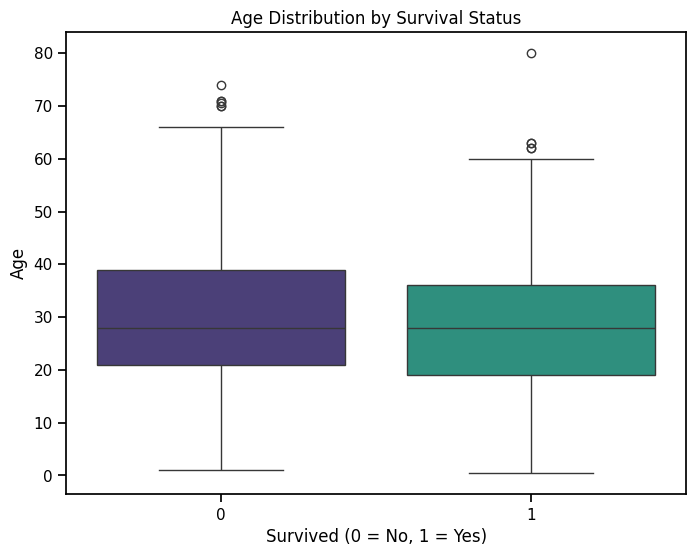

In [56]:

# Generate colors for survival status (0 = No, 1 = Yes)
palette = [continuous_cmap(0.2), continuous_cmap(0.7)]  # Different shades for better contrast

# Plotting the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='survived', y='age', data=df, palette=palette)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


/tmp/ipykernel_5929/3056008663.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




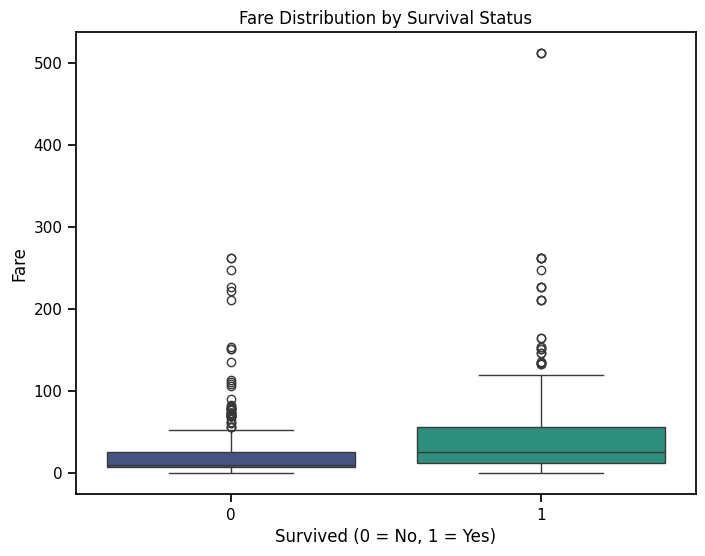

In [57]:

# Generate colors for survival status (0 = No, 1 = Yes)
palette = [continuous_cmap(0.3), continuous_cmap(0.7)]  # Different shades for better contrast

# Plotting the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='survived', y='fare', data=df, palette=palette)
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()


/tmp/ipykernel_5929/2635149538.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




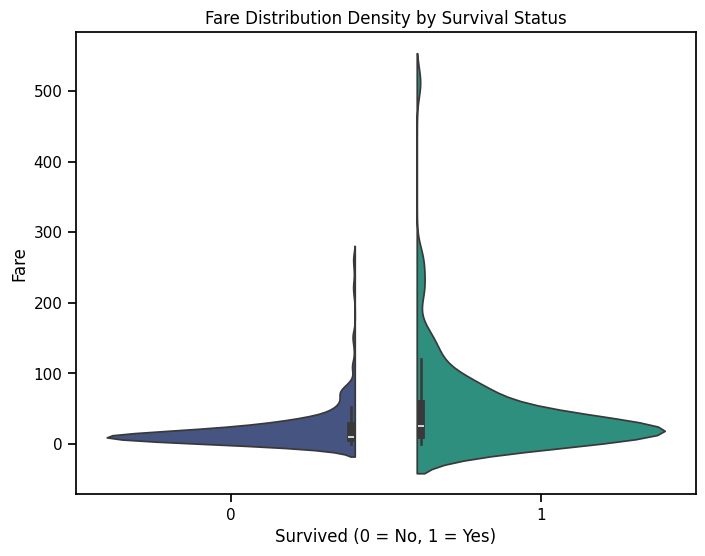

In [58]:

# Generate colors for survival status (0 = No, 1 = Yes)
palette = [continuous_cmap(0.3), continuous_cmap(0.7)]  # Two distinct shades from the custom colormap

# Plotting the violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='survived', y='fare', data=df, palette=palette, split=True)
plt.title('Fare Distribution Density by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()


/tmp/ipykernel_5929/553270120.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




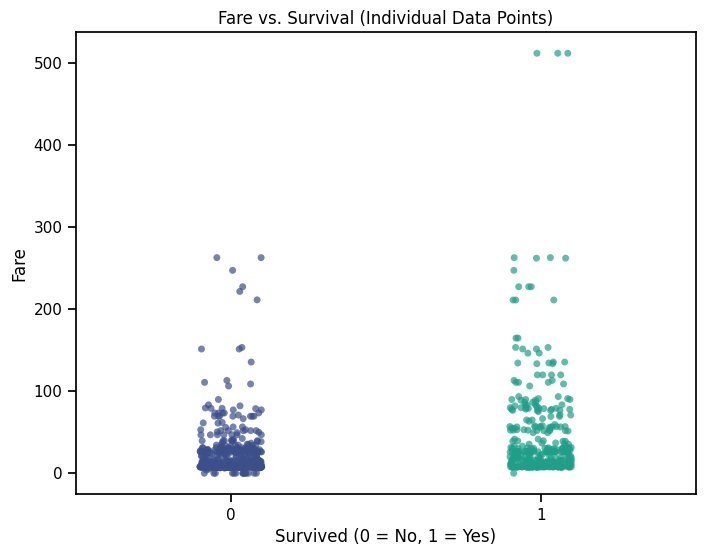

In [59]:

# Generate colors for survival status (0 = No, 1 = Yes)
palette = [continuous_cmap(0.3), continuous_cmap(0.7)]  # Two distinct shades from the custom colormap

# Plotting the strip plot
plt.figure(figsize=(8, 6))
sns.stripplot(x='survived', y='fare', data=df, palette=palette, jitter=True, alpha=0.7)
plt.title('Fare vs. Survival (Individual Data Points)')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()


## Story 2

In [60]:
# Define a custom sequential color map from dark blue to cornflower blue
custom_blue = LinearSegmentedColormap.from_list("custom_blue", ["darkblue", "cornflowerblue"])

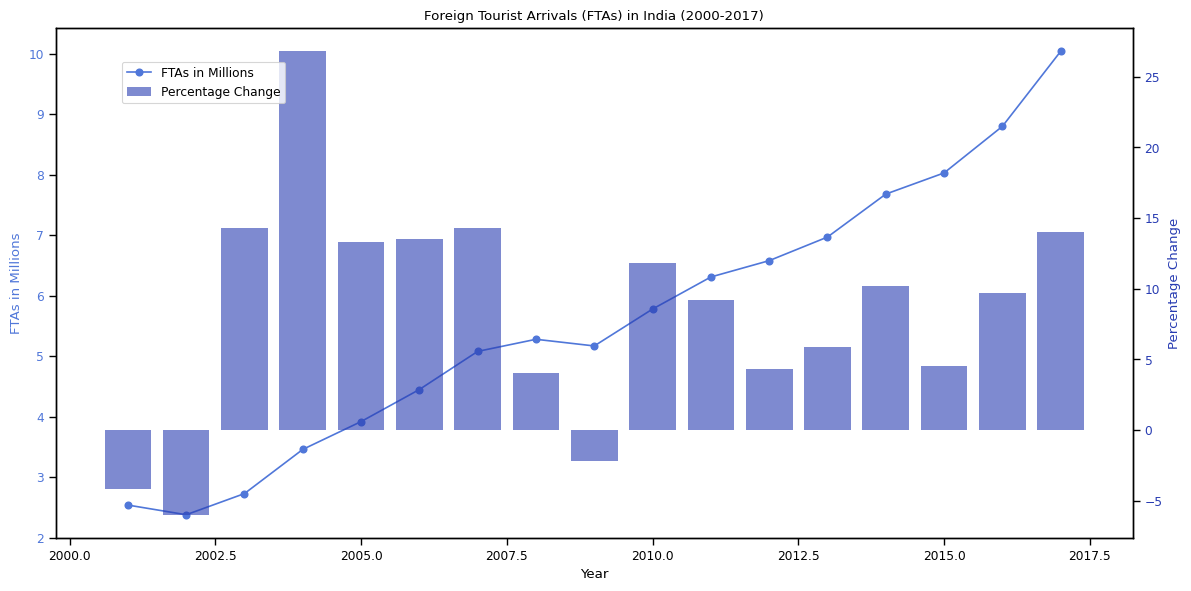

In [61]:
# Load the data
file_path = '/home/ykapil897/dv/lab_1/S2_T1_Tourism_In_India_Statistics_2018-Table_2.1.1_1.csv'
data = pd.read_csv(file_path)

# Convert 'Year' column to integer
data['Year'] = data['Year'].astype(int)

# Filter data for the years 2000 to 2017
data = data[(data['Year'] >= 2000) & (data['Year'] <= 2017)]
sns.set_context('paper') 
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Line chart for FTAs in millions using custom_blue color at 80% intensity
ax1.plot(data['Year'], data['FTAs in India (in Million)'], color=custom_blue(0.8), marker='o', label='FTAs in Millions')
ax1.set_xlabel('Year')
ax1.set_ylabel('FTAs in Millions', color=custom_blue(0.8))
ax1.tick_params(axis='y', labelcolor=custom_blue(0.8))

# Bar chart for percentage change year-over-year using custom_blue color at 40% intensity
ax2 = ax1.twinx()
ax2.bar(data['Year'], data['FTAs in India - Percentage change over previous year'], alpha=0.6, color=custom_blue(0.4), label='Percentage Change')
ax2.set_ylabel('Percentage Change', color=custom_blue(0.4))
ax2.tick_params(axis='y', labelcolor=custom_blue(0.4))

# Title and legend
plt.title('Foreign Tourist Arrivals (FTAs) in India (2000-2017)')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show plot
plt.show()


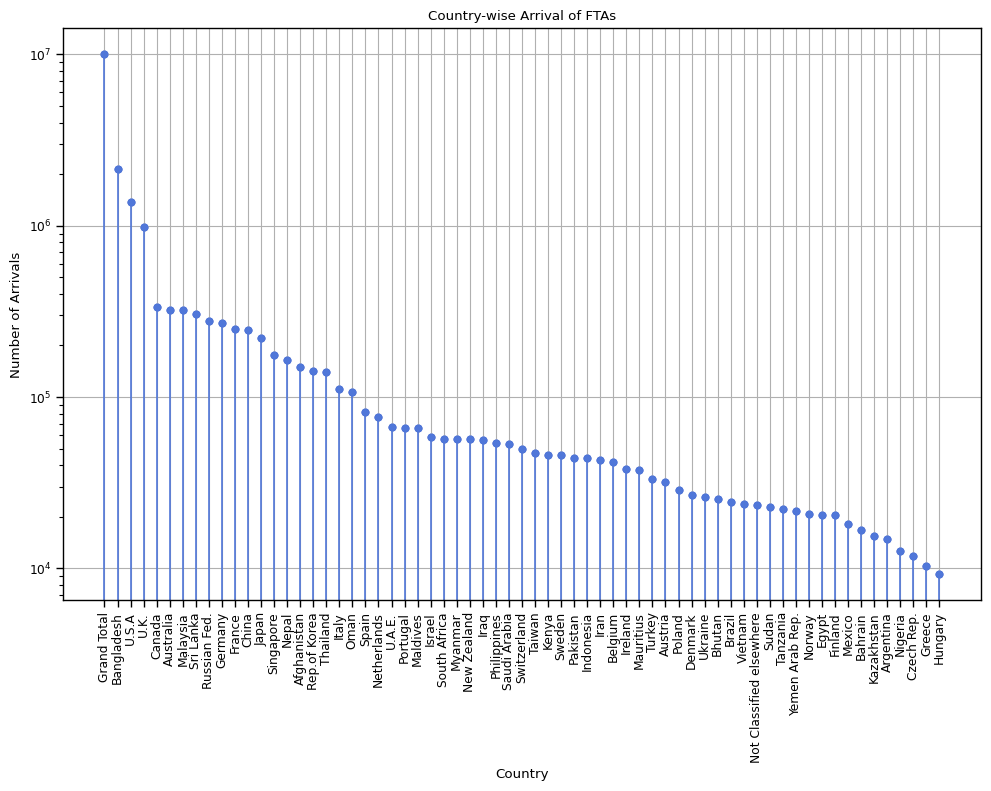

In [62]:
# Load the data
file_path = '/home/ykapil897/dv/lab_1/S2_T2_2_Tourism_In_India_Statistics_2018-Table_2.7.2.csv'
data = pd.read_csv(file_path)

# Filter data for countries and arrivals, excluding 'Total' and 'Others'
countries_data = data[~data['Country of Nationality'].isin(['Total', 'Others'])][['Country of Nationality', 'Arrivals']].drop_duplicates()

# Sort data by number of arrivals
countries_data = countries_data.sort_values(by='Arrivals', ascending=False)

# Plotting lollipop chart with custom_blue
plt.figure(figsize=(10, 8))
# Stem lines using a darker shade of custom_blue
plt.stem(countries_data['Country of Nationality'], countries_data['Arrivals'], basefmt=" ", 
         linefmt=custom_blue(0.8), markerfmt='o')

# Scatter points using a lighter shade of custom_blue
plt.scatter(countries_data['Country of Nationality'], countries_data['Arrivals'], color=custom_blue(0.4))
plt.yscale('log')
# Styling
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Arrivals')
plt.title('Country-wise Arrival of FTAs')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [63]:
# Load the data
file_path = '/home/ykapil897/dv/lab_1/S2_T2_1_Tourism_In_India_Statistics_2018-Table_2.2.1.csv'
data = pd.read_csv(file_path)

# Filter data for the year 2017
data_2017 = data[['Region/Country ', 'Number of Arrivals - 2017']]

# Sort data by number of arrivals
data_2017 = data_2017.sort_values(by='Number of Arrivals - 2017', ascending=False)

# Define nodes and links for Sankey diagram
countries = data_2017['Region/Country '].tolist()
arrivals = data_2017['Number of Arrivals - 2017'].tolist()

# Create labels for nodes
labels = countries + ['Total Arrivals']

# Create source and target indices
source_indices = list(range(len(countries)))
target_indices = [len(countries)] * len(countries)

# Generate valid RGBA strings with proper float conversion
link_colors = [
    f'rgba({float(custom_blue(i / len(countries))[0])}, '
    f'{float(custom_blue(i / len(countries))[1])}, '
    f'{float(custom_blue(i / len(countries))[2])}, 0.8)'
    for i in range(len(countries))
]

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="darkblue", width=0.5),
        label=labels,
        color='darkblue'  # Nodes in dark blue
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=arrivals,
        color=link_colors  # Gradient from custom_blue
    ))])

# Layout styling
fig.update_layout(title_text="Country-wise Arrival of FTAs in 2017", font_size=10)
fig.show()


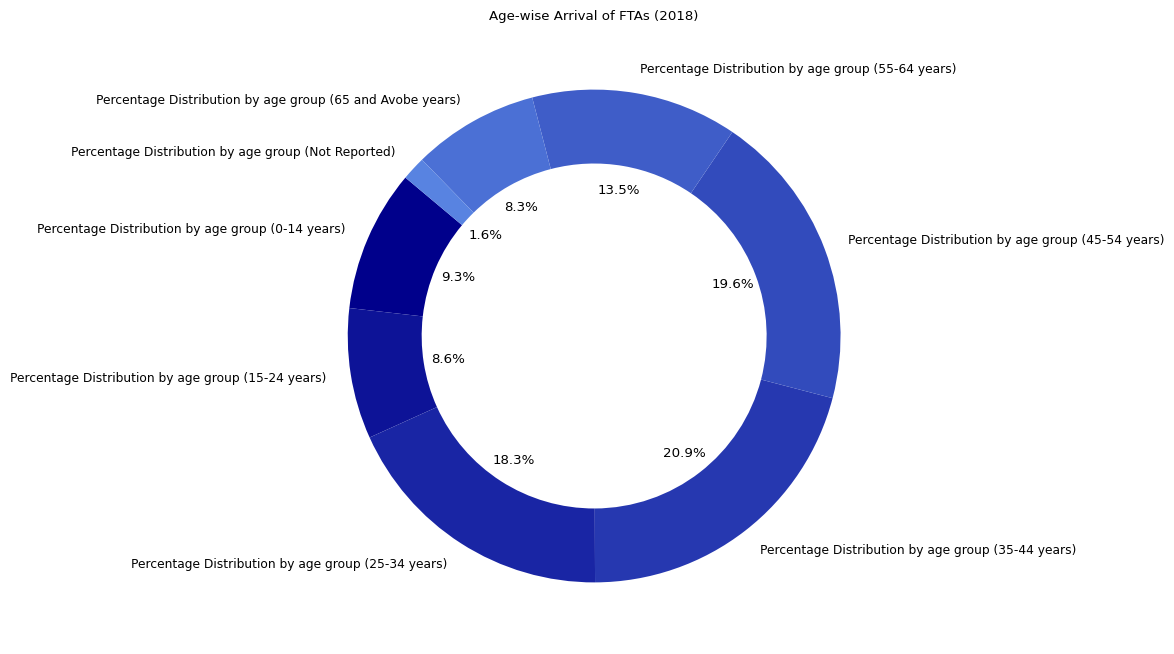

In [64]:
# -------------------- Age-wise Arrival of FTAs (2018) -------------------- #
file_path = '/home/ykapil897/dv/lab_1/S2_T3_1_Tourism_In_India_Statistics_2018-Table_2.7.1.csv'
data = pd.read_csv(file_path)

age_groups = [
    'Percentage Distribution by age group (0-14 years)',
    'Percentage Distribution by age group (15-24 years)',
    'Percentage Distribution by age group (25-34 years)',
    'Percentage Distribution by age group (35-44 years)',
    'Percentage Distribution by age group (45-54 years)',
    'Percentage Distribution by age group (55-64 years)',
    'Percentage Distribution by age group (65 and Avobe years)',
    'Percentage Distribution by age group (Not Reported)'
]

for age_group in age_groups:
    data[age_group] = data[age_group] * data['FTAs']

age_wise_distribution = data[age_groups].sum()

# Generate colors from the custom colormap
colors = [custom_blue(i / len(age_groups)) for i in range(len(age_groups))]

# Plot using the custom blue colors
plt.figure(figsize=(8, 8))
plt.pie(
    age_wise_distribution, 
    labels=age_groups, 
    autopct='%1.1f%%', 
    startangle=140, 
    wedgeprops=dict(width=0.3), 
    colors=colors  # Applying custom_blue colors
)
plt.title('Age-wise Arrival of FTAs (2018)')
plt.show()

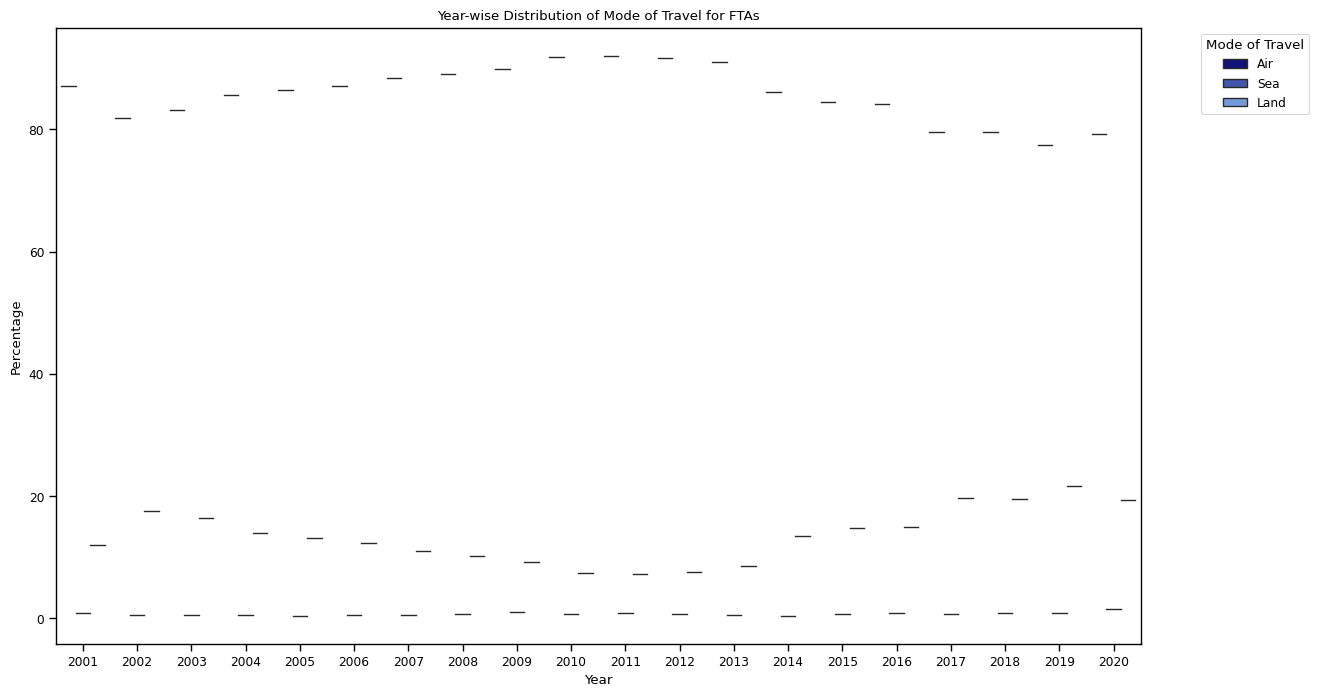

In [65]:
# Load the data
file_path_2021 = '/home/ykapil897/dv/lab_1/S2_T3_2_India-Tourism-Statistics-2021-Table-2.4.1.csv'
data_2021 = pd.read_csv(file_path_2021)

# Melt the data to have a long format for seaborn plot
melted_data_2021 = pd.melt(data_2021, id_vars=['Year'], value_vars=[
    '% distribution by mode of travel - Air',
    '% distribution by mode of travel - Sea',
    '% distribution by mode of travel - Land'
], var_name='Mode of Travel', value_name='Percentage')

# Rename the modes of travel for better readability
melted_data_2021['Mode of Travel'] = melted_data_2021['Mode of Travel'].replace({
    '% distribution by mode of travel - Air': 'Air',
    '% distribution by mode of travel - Sea': 'Sea',
    '% distribution by mode of travel - Land': 'Land'
})

# Generate colors from the custom colormap
num_modes = melted_data_2021['Mode of Travel'].nunique()
colors = [custom_blue(i / (num_modes - 1)) for i in range(num_modes)]

# Set the custom palette for seaborn
palette = dict(zip(melted_data_2021['Mode of Travel'].unique(), colors))

# Plotting violin plot with custom blue palette
plt.figure(figsize=(14, 8))
sns.violinplot(
    x='Year', 
    y='Percentage', 
    hue='Mode of Travel', 
    data=melted_data_2021, 
    split=True, 
    inner="quart", 
    palette=palette
)
plt.title('Year-wise Distribution of Mode of Travel for FTAs')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Mode of Travel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


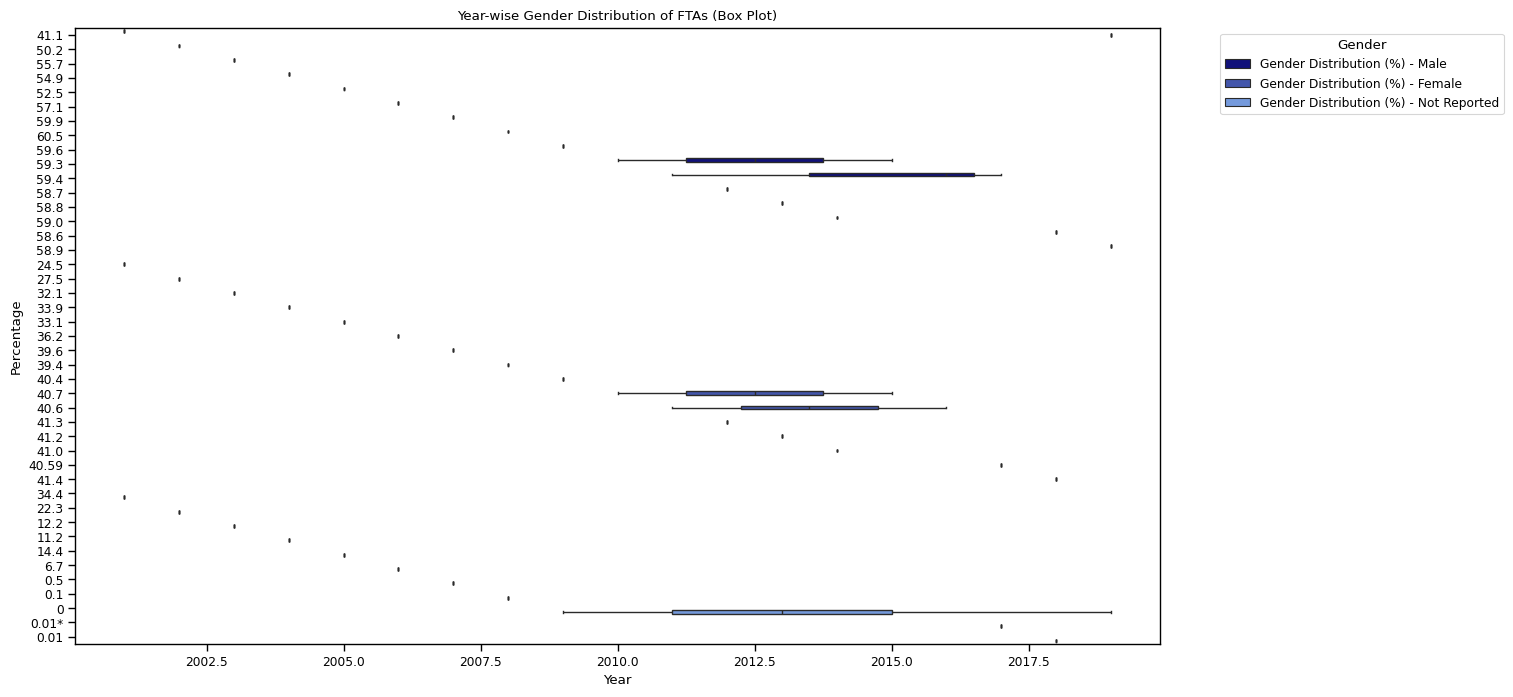

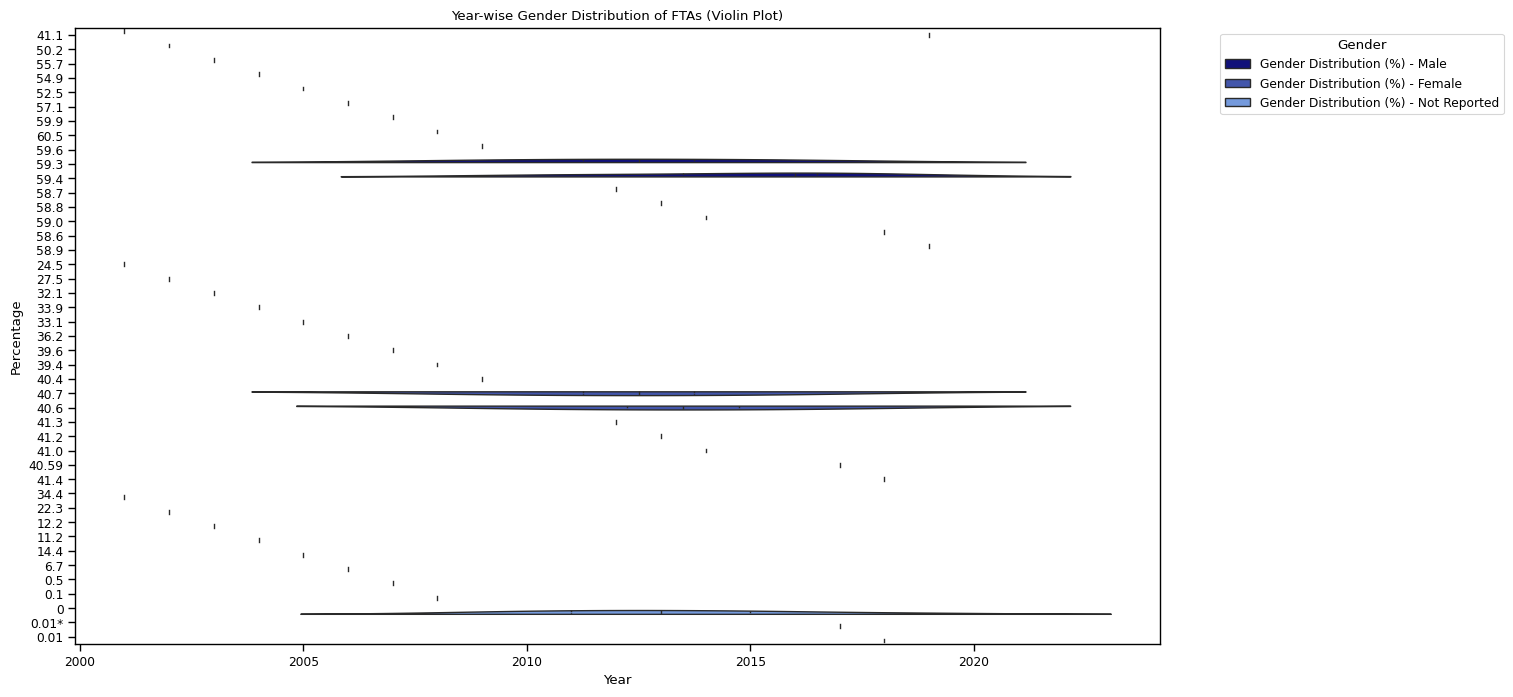

In [66]:
# Load the data
file_path = '/home/ykapil897/dv/lab_1/S2_T3_3_India-Tourism-Statistics-2020-TABLE-2.6.1.csv'
data = pd.read_csv(file_path)

# Melt the gender data to have a long format for seaborn plot
gender_groups = ['Gender Distribution (%) - Male', 'Gender Distribution (%) - Female', 'Gender Distribution (%) - Not Reported']
melted_gender_data = pd.melt(data, id_vars=['Year'], value_vars=gender_groups, 
                             var_name='Gender', value_name='Percentage')

# Generate colors from the custom colormap for gender groups
num_genders = melted_gender_data['Gender'].nunique()
colors = [custom_blue(i / (num_genders - 1)) for i in range(num_genders)]

# Set the custom palette for seaborn
palette = dict(zip(melted_gender_data['Gender'].unique(), colors))

# Plotting multiple box plots with custom blue palette
plt.figure(figsize=(14, 8))
sns.boxplot(x='Year', y='Percentage', hue='Gender', data=melted_gender_data, palette=palette)
plt.title('Year-wise Gender Distribution of FTAs (Box Plot)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plotting multiple violin plots with custom blue palette
plt.figure(figsize=(14, 8))
sns.violinplot(x='Year', y='Percentage', hue='Gender', data=melted_gender_data, split=True, inner="quart", palette=palette)
plt.title('Year-wise Gender Distribution of FTAs (Violin Plot)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [67]:
# Load the data
file_path = '/home/ykapil897/dv/lab_1/S2_T3_4_India-Tourism-Statistics-2019-Table-2.7.2.csv'
data = pd.read_csv(file_path)

# Filter data to include only rows where 'Country of Nationality' is 'Total'
filtered_data = data[data['Country of Nationality'] == 'Total']

# Define the age group columns
age_groups = ['0-14', '15-24', '25-34', '35-44', '45-54', '55-64', '65 and Above']

# Multiply each age group percentage by the corresponding number of arrivals
for age_group in age_groups:
    filtered_data[age_group] = filtered_data[age_group] * filtered_data['Arrivals (in Numbers)'] / 100

# Melt the data to have a long format for plotly treemap
melted_data = pd.melt(filtered_data, id_vars=['Category'], value_vars=age_groups, 
                      var_name='Age Group', value_name='Arrivals')

# Generate a list of colors from the colormap
num_ages = melted_data['Age Group'].nunique()
colors = [custom_blue(i / (num_ages - 1)) for i in range(num_ages)]

# Convert RGBA to HEX since Plotly requires HEX colors
hex_colors = [f'#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}' for r, g, b, _ in colors]

# Plotting Treemap with custom blue color scale
fig = px.treemap(
    melted_data, 
    path=['Category', 'Age Group'], 
    values='Arrivals',
    color='Arrivals', 
    hover_data=['Arrivals'],
    color_continuous_scale=hex_colors,  # Apply custom blue gradient
    title='Nationality-wise Age Distribution of FTAs'
)

fig.show()


/tmp/ipykernel_5929/2670545609.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Story3

In [68]:
# Define Bipolar Sequential Color Palette (e.g., transitioning from dark blue to white to dark red)
bipolar_sequential = LinearSegmentedColormap.from_list("bipolar_sequential", ["navy", "white", "red"])


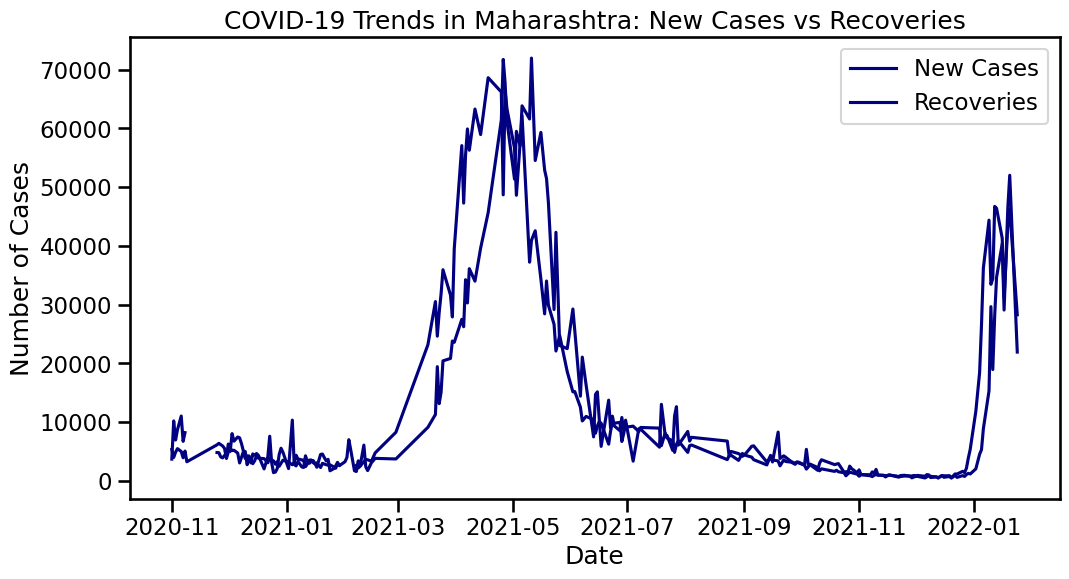

In [69]:
# Load data
file_path = '/home/ykapil897/dv/lab_1/S3_MH_case_info.csv'
covid_data = pd.read_csv(file_path)

sns.set_context('talk')
# Convert 'date' column to datetime format
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(covid_data['date'], covid_data['cases_new'], color=bipolar_sequential(0), label='New Cases')  # Dark Blue
plt.plot(covid_data['date'], covid_data['discharged_today'], color=bipolar_sequential(1), label='Recoveries')  # Dark Red

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Trends in Maharashtra: New Cases vs Recoveries')
plt.legend()

# Display the plot
plt.show()


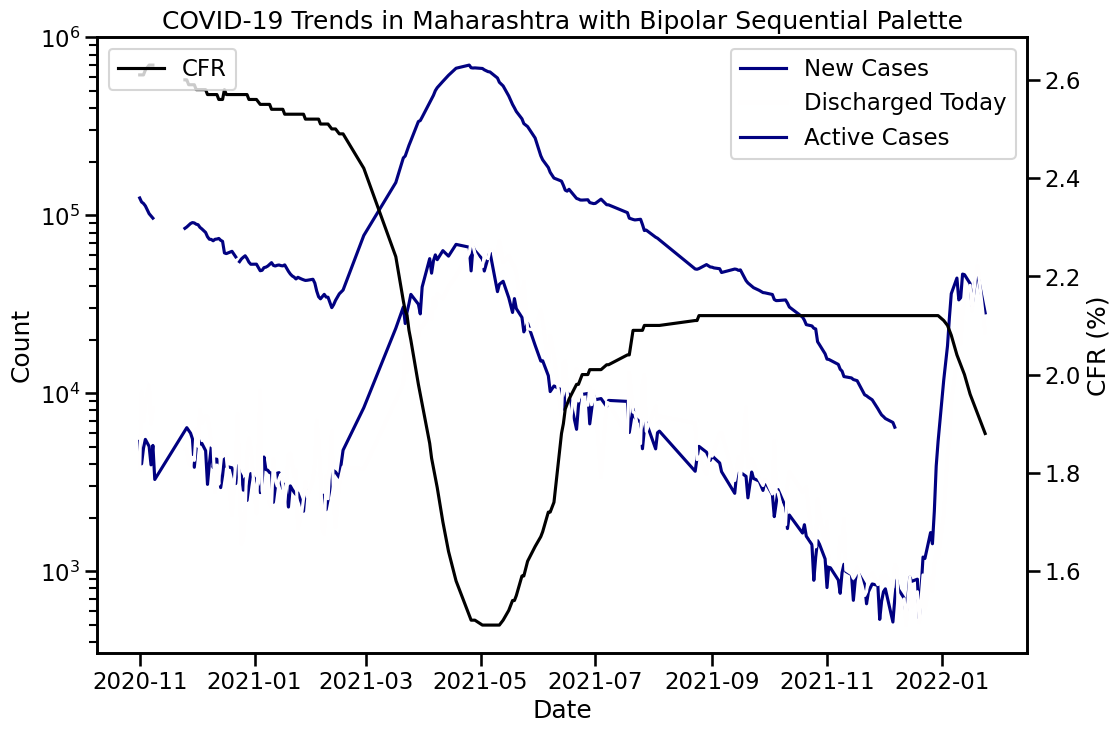

In [70]:

# Load the dataset
file_path = '/home/ykapil897/dv/lab_1/S3_MH_case_info.csv'
covid_stats = pd.read_csv(file_path)

# Convert 'date' column to datetime
covid_stats['date'] = pd.to_datetime(covid_stats['date'])

# Create a figure with dual y-axes
fig, primary_axis = plt.subplots(figsize=(12, 8))

# Plot new cases, discharged cases, and active cases using the bipolar sequential palette
primary_axis.plot(covid_stats['date'], covid_stats['cases_new'], color=bipolar_sequential(0), label='New Cases')  # Dark Blue
primary_axis.plot(covid_stats['date'], covid_stats['discharged_today'], color=bipolar_sequential(0.5), label='Discharged Today')  # White
primary_axis.plot(covid_stats['date'], covid_stats['active_cases'], color=bipolar_sequential(1), label='Active Cases')  # Dark Red

# Set log scale for the primary y-axis
primary_axis.set_yscale('log')
primary_axis.set_xlabel('Date')
primary_axis.set_ylabel('Count')
primary_axis.legend(loc='upper right')

# Create a secondary y-axis for CFR
secondary_axis = primary_axis.twinx()
secondary_axis.plot(covid_stats['date'], covid_stats['cfr'], color='black', label='CFR')  # Black for CFR

secondary_axis.set_ylabel('CFR (%)')
secondary_axis.legend(loc='upper left')

# Add a title to the plot
plt.title('COVID-19 Trends in Maharashtra with Bipolar Sequential Palette')

# Display the plot
plt.show()


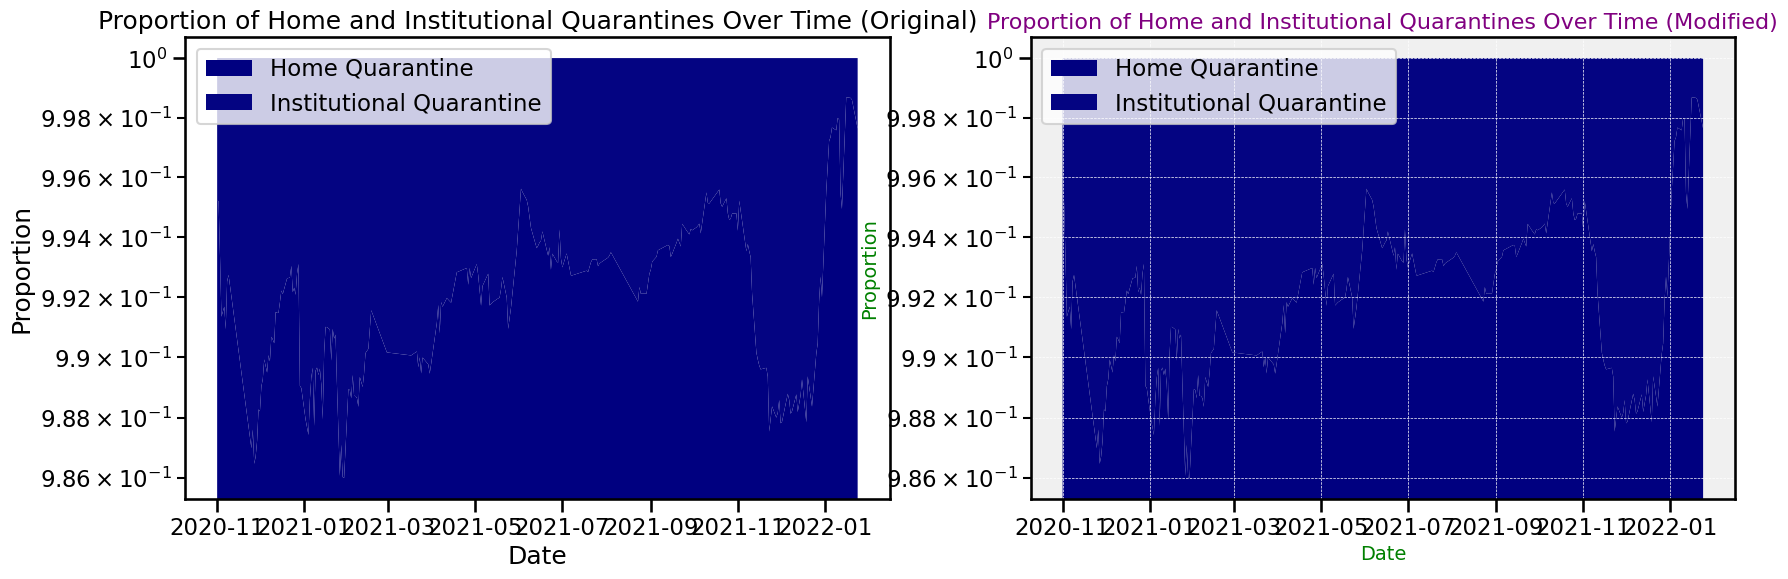

In [71]:
# Load the dataset
file_path = '/home/ykapil897/dv/lab_1/S3_MH_case_info.csv'
quarantine_data = pd.read_csv(file_path)

# Convert 'date' column to datetime format
quarantine_data['date'] = pd.to_datetime(quarantine_data['date'])

# Calculate total quarantines and proportions
quarantine_data['total_quarantine'] = (
    quarantine_data['current_home_quarantine'] + quarantine_data['current_institutional_quarantine']
)
quarantine_data['home_quarantine_share'] = (
    quarantine_data['current_home_quarantine'] / quarantine_data['total_quarantine']
)
quarantine_data['institutional_quarantine_share'] = (
    quarantine_data['current_institutional_quarantine'] / quarantine_data['total_quarantine']
)

# Plot the proportions using a stackplot with bipolar sequential colors
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Original plot
ax[0].stackplot(
    quarantine_data['date'],
    quarantine_data['home_quarantine_share'],
    quarantine_data['institutional_quarantine_share'],
    labels=['Home Quarantine', 'Institutional Quarantine'],
    colors=[bipolar_sequential(0), bipolar_sequential(2)]  # Dark Blue and Dark Red
)
ax[0].set_yscale('log')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Proportion')
ax[0].set_title('Proportion of Home and Institutional Quarantines Over Time (Original)')
ax[0].legend(loc='upper left')

# Modified plot with variations in background color, gridlines, and axis labels
ax[1].stackplot(
    quarantine_data['date'],
    quarantine_data['home_quarantine_share'],
    quarantine_data['institutional_quarantine_share'],
    labels=['Home Quarantine', 'Institutional Quarantine'],
    colors=[bipolar_sequential(0), bipolar_sequential(2)]  # Dark Blue and Dark Red
)
ax[1].set_yscale('log')
ax[1].set_xlabel('Date', fontsize=14, color='green')
ax[1].set_ylabel('Proportion', fontsize=14, color='green')
ax[1].set_title('Proportion of Home and Institutional Quarantines Over Time (Modified)', fontsize=16, color='purple')
ax[1].legend(loc='upper left')
ax[1].set_facecolor('#f0f0f0')  # Light grey background
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5, color='white')

# Display the plots
plt.show()

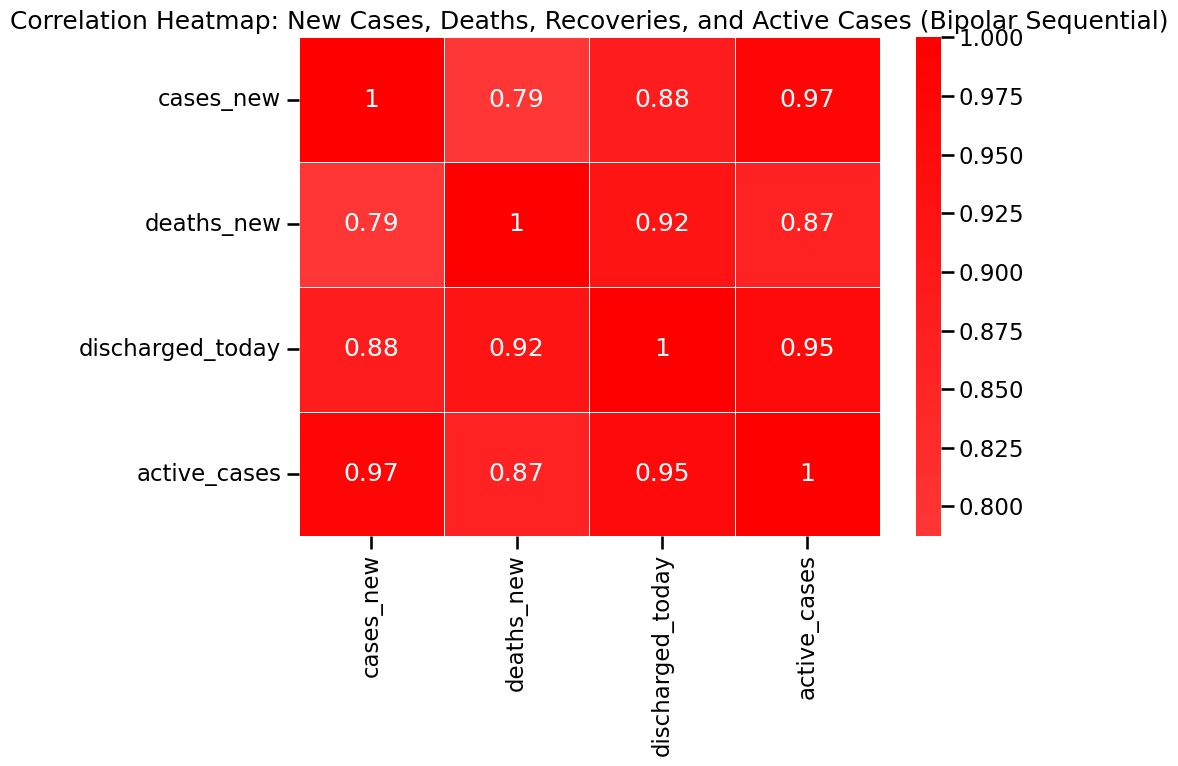

In [72]:
# Load the dataset
covid_data = pd.read_csv(file_path)

# Select columns of interest and handle missing values
features = ['cases_new', 'deaths_new', 'discharged_today', 'active_cases']
selected_data = covid_data[features].dropna()

# Calculate the correlation matrix
correlations = selected_data.corr()

# Plot the correlation heatmap using bipolar sequential palette
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap=bipolar_sequential, linewidths=0.5, center=0)
plt.title('Correlation Heatmap: New Cases, Deaths, Recoveries, and Active Cases (Bipolar Sequential)')
plt.tight_layout()

# Display the plot
plt.show()


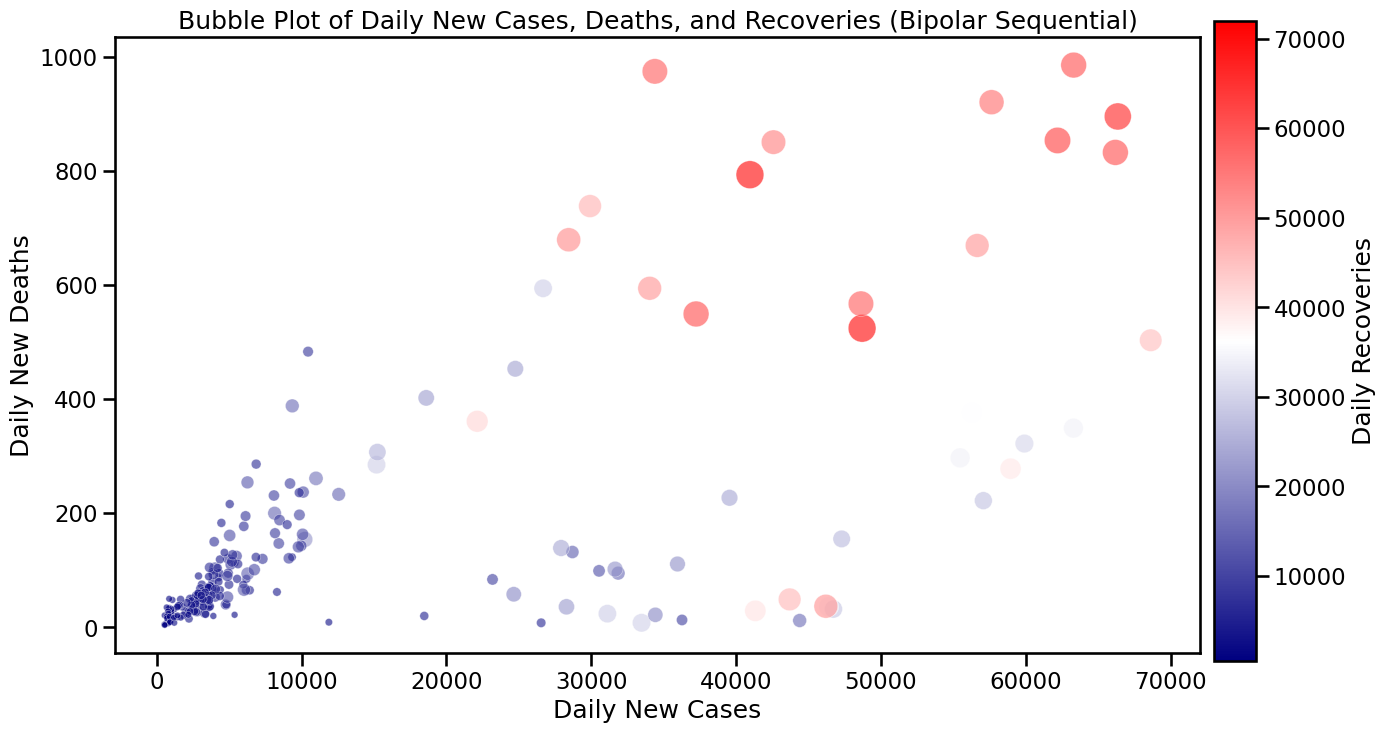

In [73]:
# Load the dataset
covid_data = pd.read_csv(file_path)

# Drop rows with missing values in the relevant columns
covid_data = covid_data.dropna(subset=['cases_new', 'deaths_new', 'discharged_today'])

# Create the bubble plot with bipolar sequential color palette
plt.figure(figsize=(14, 8))
sns.scatterplot(
    x='cases_new',
    y='deaths_new',
    size='discharged_today',
    hue='discharged_today',
    data=covid_data,
    palette=bipolar_sequential,
    sizes=(20, 400),
    alpha=0.6,
    edgecolor='w',
    legend=None
)

# Add titles and labels
plt.title('Bubble Plot of Daily New Cases, Deaths, and Recoveries (Bipolar Sequential)')
plt.xlabel('Daily New Cases')
plt.ylabel('Daily New Deaths')

# Add a colorbar for the 'discharged_today' variable
norm = plt.Normalize(covid_data['discharged_today'].min(), covid_data['discharged_today'].max())
sm = plt.cm.ScalarMappable(cmap=bipolar_sequential, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Daily Recoveries', cax=plt.axes([0.91, 0.1, 0.03, 0.8]))

# Display the plot
plt.show()


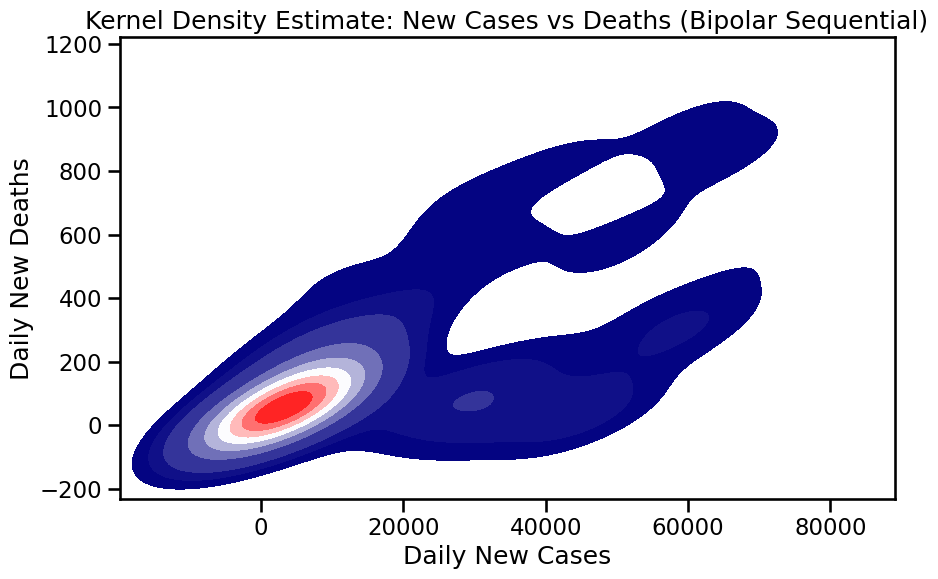

In [74]:

# Load the dataset
covid_data = pd.read_csv(file_path)

# Remove rows with missing values in 'cases_new' and 'deaths_new'
covid_data = covid_data.dropna(subset=['cases_new', 'deaths_new'])

# Plot the Kernel Density Estimate (KDE) with bipolar sequential palette
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=covid_data,
    x='cases_new',
    y='deaths_new',
    fill=True,
    cmap=bipolar_sequential
)

# Add titles and labels
plt.title('Kernel Density Estimate: New Cases vs Deaths (Bipolar Sequential)')
plt.xlabel('Daily New Cases')
plt.ylabel('Daily New Deaths')

# Display the plot
plt.show()


# Used log scale in plot below

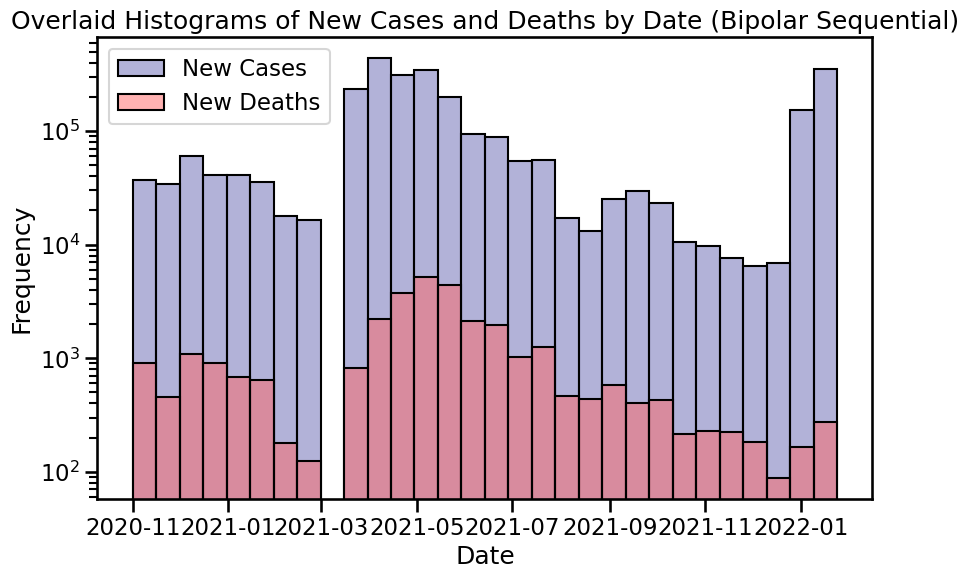

In [75]:

# Load the dataset
covid_data = pd.read_csv(file_path)

# Convert the 'date' column to datetime
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Drop rows with missing values in 'cases_new' and 'deaths_new'
covid_data = covid_data.dropna(subset=['cases_new', 'deaths_new'])

# Aggregate data by date
daily_data = covid_data.groupby('date').sum().reset_index()

# Plot overlaid histograms using bipolar sequential palette
plt.figure(figsize=(10, 6))
sns.histplot(
    data=daily_data, 
    x='date', 
    weights='cases_new', 
    bins=30, 
    color=bipolar_sequential(0.2),  # Dark blue for new cases
    label='New Cases', 
    kde=False, 
    alpha=0.5
)
sns.histplot(
    data=daily_data, 
    x='date', 
    weights='deaths_new', 
    bins=30, 
    color=bipolar_sequential(0.8),  # Dark red for new deaths
    label='New Deaths', 
    kde=False, 
    alpha=0.5
)

# Set logarithmic scale for y-axis
plt.yscale('log')

# Add title, labels, and legend
plt.title('Overlaid Histograms of New Cases and Deaths by Date (Bipolar Sequential)')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()

# Display the plot
plt.show()


# Story 4

In [76]:
# Define the custom colors from your book in HEX format
custom_colors = [
    '#D55E00',  # Vermilion
    '#009E73',  # Bluish Green
    '#0072B2',  # Blue
    '#F0E442',  # Yellow
    '#000000',  # Black
    '#FFFFFF',  # White
    '#E69F00',  # Orange
    '#56B4E9',  # Sky Blue
    '#CC79A7'   # Reddish Purple
]

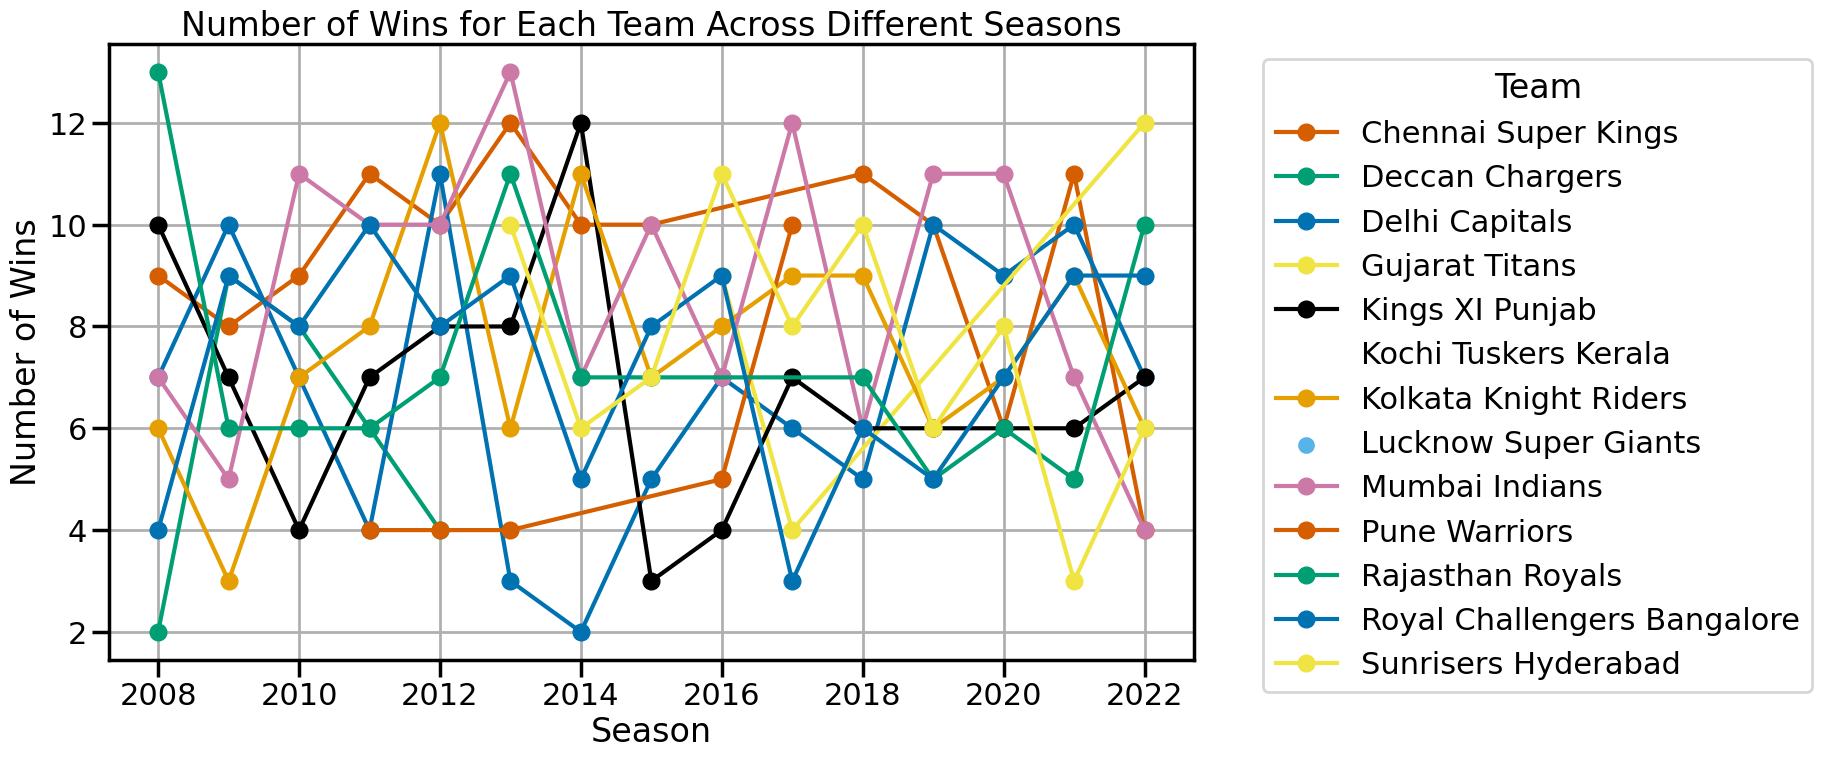

In [77]:
# Load the data
file_path = '/home/ykapil897/dv/lab_1/IPL_Matches_2008_2022.csv'
data = pd.read_csv(file_path)
sns.set_context('poster') 
# Consolidate team names
team_name_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Rising Pune Supergiant': 'Pune Warriors',
    'Rising Pune Supergiants': 'Pune Warriors',
    'Gujarat Lions': 'Gujarat Titans',
    'Punjab Kings': 'Kings XI Punjab'
}
data['WinningTeam'] = data['WinningTeam'].replace(team_name_mapping)

# Replace season names
season_mapping = {
    '2007/08': '2008',
    '2009/10': '2010',
    '2020/21': '2020'
}
data['Season'] = data['Season'].replace(season_mapping).astype(int)

# Filter out rows where WinningTeam is NaN
data = data.dropna(subset=['WinningTeam'])

# Group by Season and WinningTeam to count wins
wins_per_season = data.groupby(['Season', 'WinningTeam']).size().reset_index(name='Wins')

# Pivot table: seasons as rows, teams as columns
wins_pivot = wins_per_season.pivot(index='Season', columns='WinningTeam', values='Wins').fillna(pd.NA)

# Identify one-season teams
one_season_teams = wins_pivot.columns[wins_pivot.apply(lambda x: x.sum() > 0, axis=0) & (wins_pivot.notna().sum(axis=0) == 1)]

# Assign colors to teams cyclically
team_colors = {team: custom_colors[i % len(custom_colors)] for i, team in enumerate(wins_pivot.columns)}

# Plotting
plt.figure(figsize=(14, 8))
for team in wins_pivot.columns:
    team_data = wins_pivot[team].dropna()
    color = team_colors[team]
    if team in one_season_teams:
        plt.scatter(team_data.index, team_data.values, s=100, color=color, label=team)  # Larger dots for one-season teams
    else:
        plt.plot(team_data.index, team_data.values, marker='o', color=color, label=team)
        plt.scatter(team_data.index, team_data.values, s=50, color=color)  # Smaller dots for multi-season teams

# Add plot details
plt.title('Number of Wins for Each Team Across Different Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



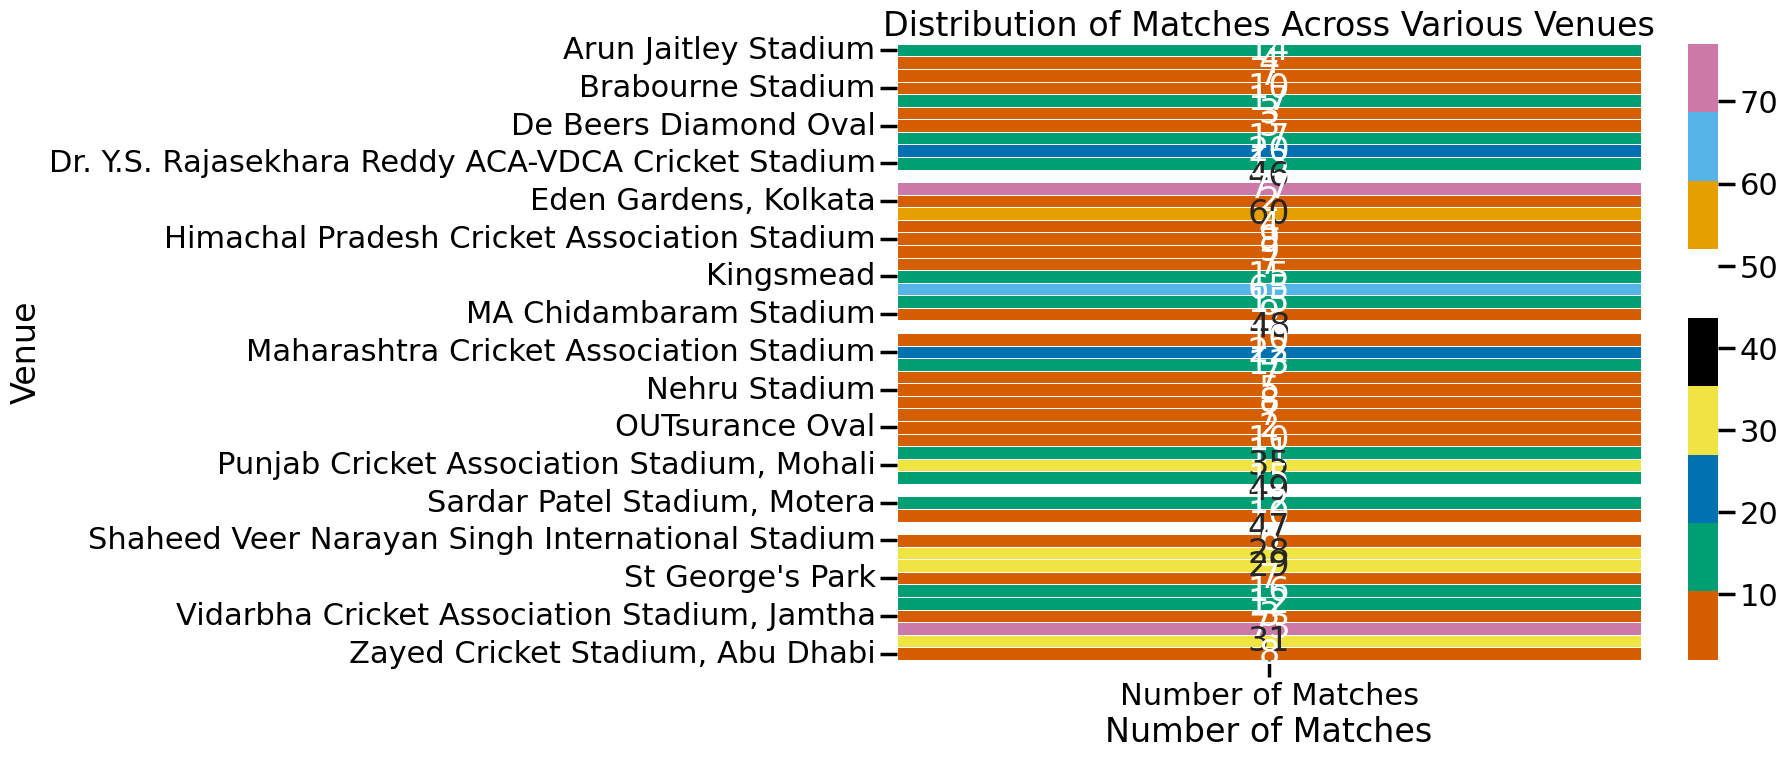

/tmp/ipykernel_5929/3456511988.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




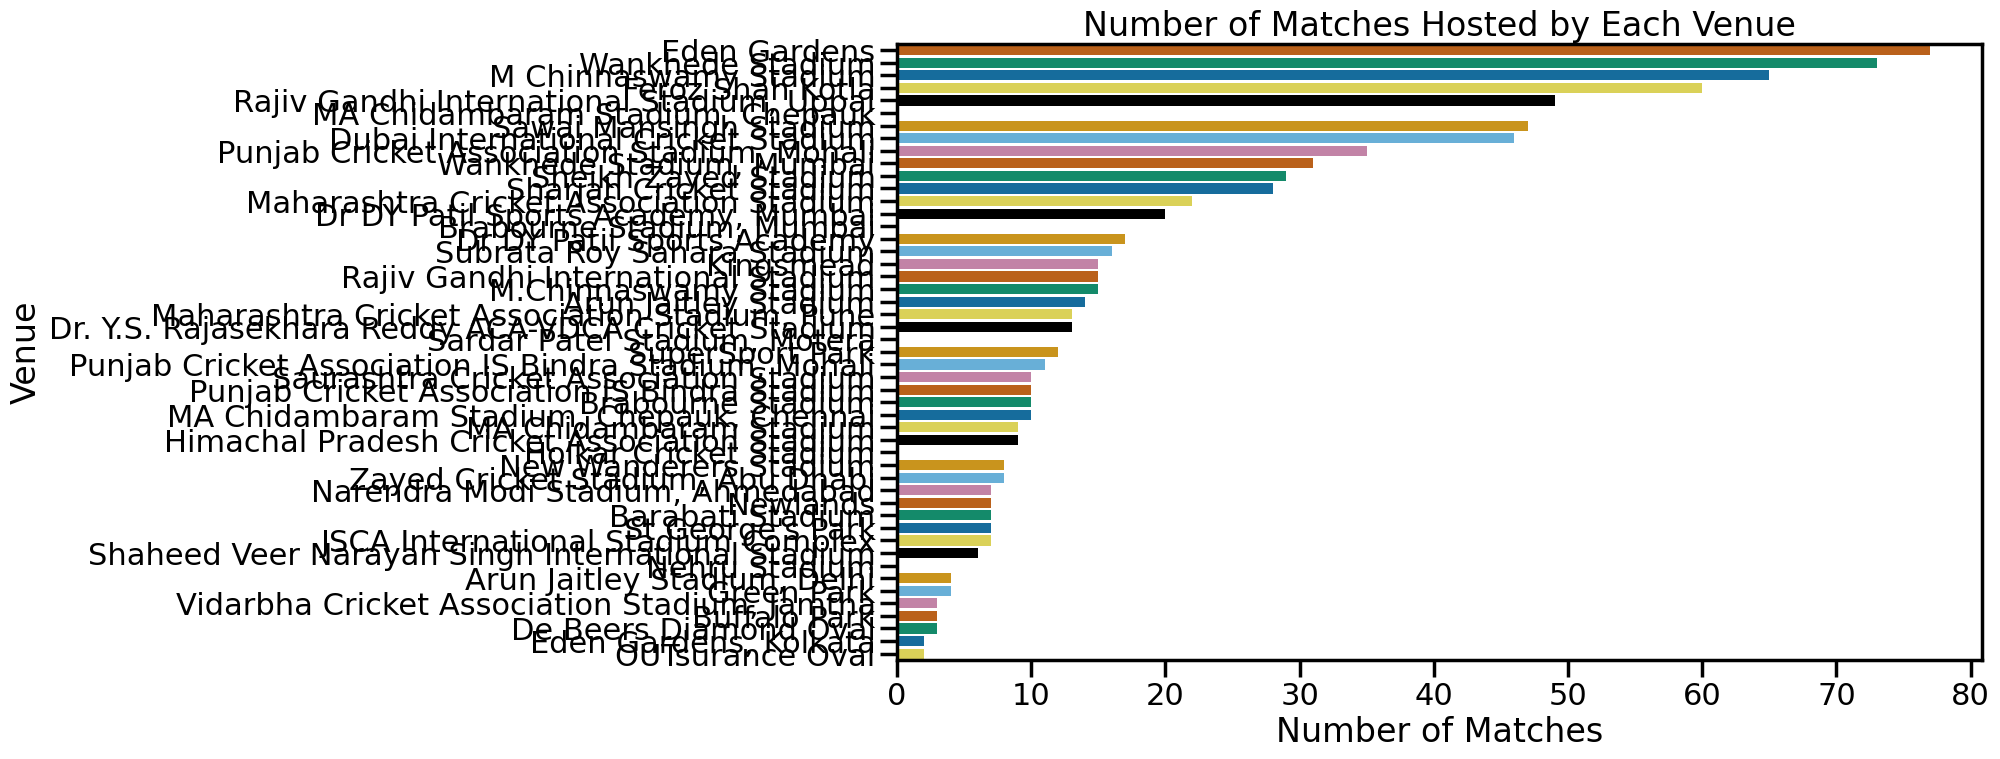

In [78]:
# Load the data
file_path = '/home/ykapil897/dv/lab_1/IPL_Matches_2008_2022.csv'
data = pd.read_csv(file_path)

# Group by Venue to count the number of matches hosted by each venue
venue_counts = data['Venue'].value_counts().reset_index()
venue_counts.columns = ['Venue', 'Number of Matches']

# Cycle through custom colors for venues
color_palette = custom_colors * (len(venue_counts) // len(custom_colors) + 1)
venue_colors = color_palette[:len(venue_counts)]

# Plotting heatmap
plt.figure(figsize=(12, 8))
heatmap_data = venue_counts.pivot_table(index='Venue', values='Number of Matches', aggfunc='sum')
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt='d', 
    cmap=sns.color_palette(custom_colors, as_cmap=True), 
    linewidths=.5
)
plt.title('Distribution of Matches Across Various Venues')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.show()

# Plotting bar chart
plt.figure(figsize=(14, 8))
sns.barplot(
    x='Number of Matches', 
    y='Venue', 
    data=venue_counts, 
    palette=venue_colors
)
plt.title('Number of Matches Hosted by Each Venue')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.show()


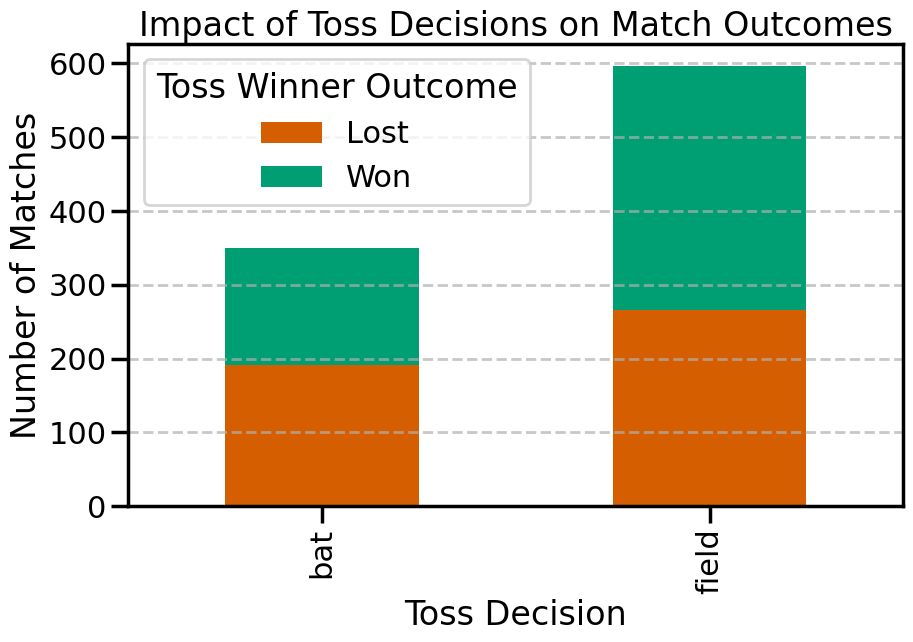

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/home/ykapil897/dv/lab_1/IPL_Matches_2008_2022.csv'
data = pd.read_csv(file_path)

# Filter out rows where WinningTeam is NaN
data = data.dropna(subset=['WinningTeam'])

# Create a new column to indicate if the toss winner won the match
data['TossWinnerWon'] = data['TossWinner'] == data['WinningTeam']

# Group by TossDecision and TossWinnerWon to count the number of matches
toss_impact = data.groupby(['TossDecision', 'TossWinnerWon']).size().reset_index(name='Count')

# Pivot the data to have TossDecision as columns and TossWinnerWon as rows
toss_pivot = toss_impact.pivot(index='TossDecision', columns='TossWinnerWon', values='Count').fillna(0)

# Plotting stacked bar chart with custom colors
toss_pivot.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6), 
    color=custom_colors[:2]
)
plt.title('Impact of Toss Decisions on Match Outcomes')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Matches')
plt.legend(['Lost', 'Won'], title='Toss Winner Outcome')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


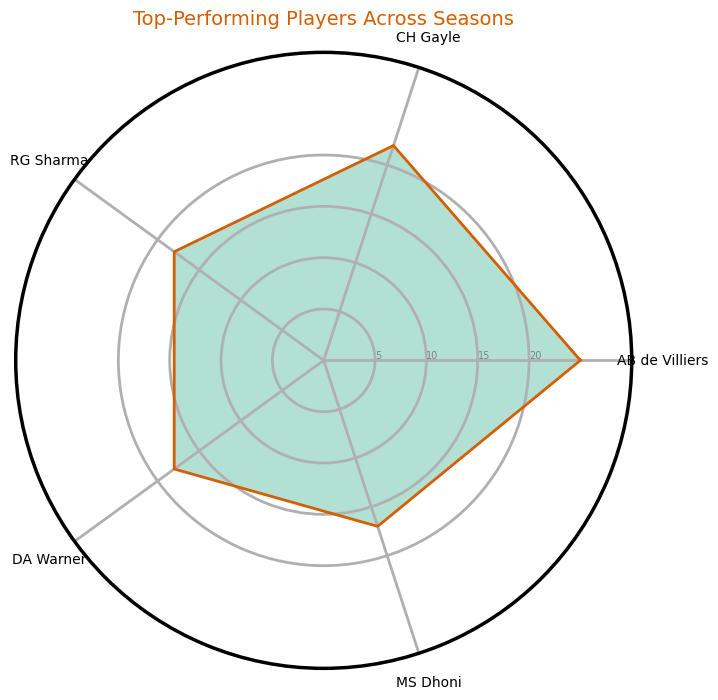

In [80]:
from math import pi

# Load the data
file_path = '/home/ykapil897/dv/lab_1/IPL_Matches_2008_2022.csv'
data = pd.read_csv(file_path)

# Count the number of "Player of the Match" awards for each player
player_awards = data['Player_of_Match'].value_counts().reset_index()
player_awards.columns = ['Player', 'Awards']

# Select the top 5 players with the most "Player of the Match" awards
top_players = player_awards.head(5)

# Prepare data for radar chart
categories = top_players['Player'].tolist()
values = top_players['Awards'].tolist()

# Number of variables
num_vars = len(categories)

# Compute angle of each axis
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Initialize radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], categories, color='black', size=10)

# Draw y-labels
ax.set_rlabel_position(0)
plt.yticks([5, 10, 15, 20], ["5", "10", "15", "20"], color="grey", size=7)
plt.ylim(0, max(values) + 5)

# Plot data with custom colors
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', color=custom_colors[0])

# Fill area with custom color
ax.fill(angles, values, custom_colors[1], alpha=0.3)

# Title
plt.title('Top-Performing Players Across Seasons', size=14, color=custom_colors[0], pad=20)
plt.show()


/tmp/ipykernel_5929/3944821061.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




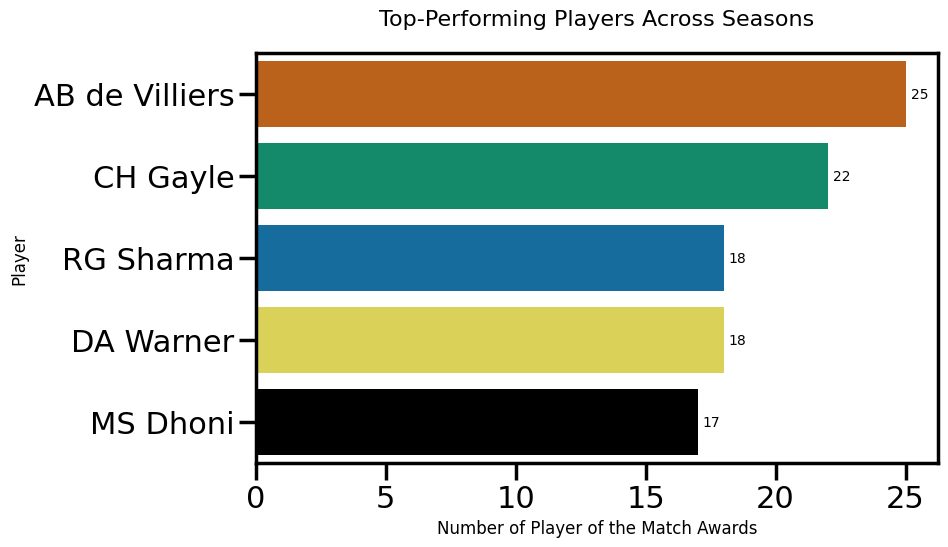

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting bar chart for top-performing players using custom colors
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Awards',
    y='Player',
    data=top_players,
    palette=custom_colors[:len(top_players)]  # Use only as many colors as needed
)

# Styling the plot
plt.title('Top-Performing Players Across Seasons', fontsize=16, pad=20)
plt.xlabel('Number of Player of the Match Awards', fontsize=12)
plt.ylabel('Player', fontsize=12)

# Add annotations on bars
for index, value in enumerate(top_players['Awards']):
    plt.text(value + 0.2, index, str(value), va='center', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


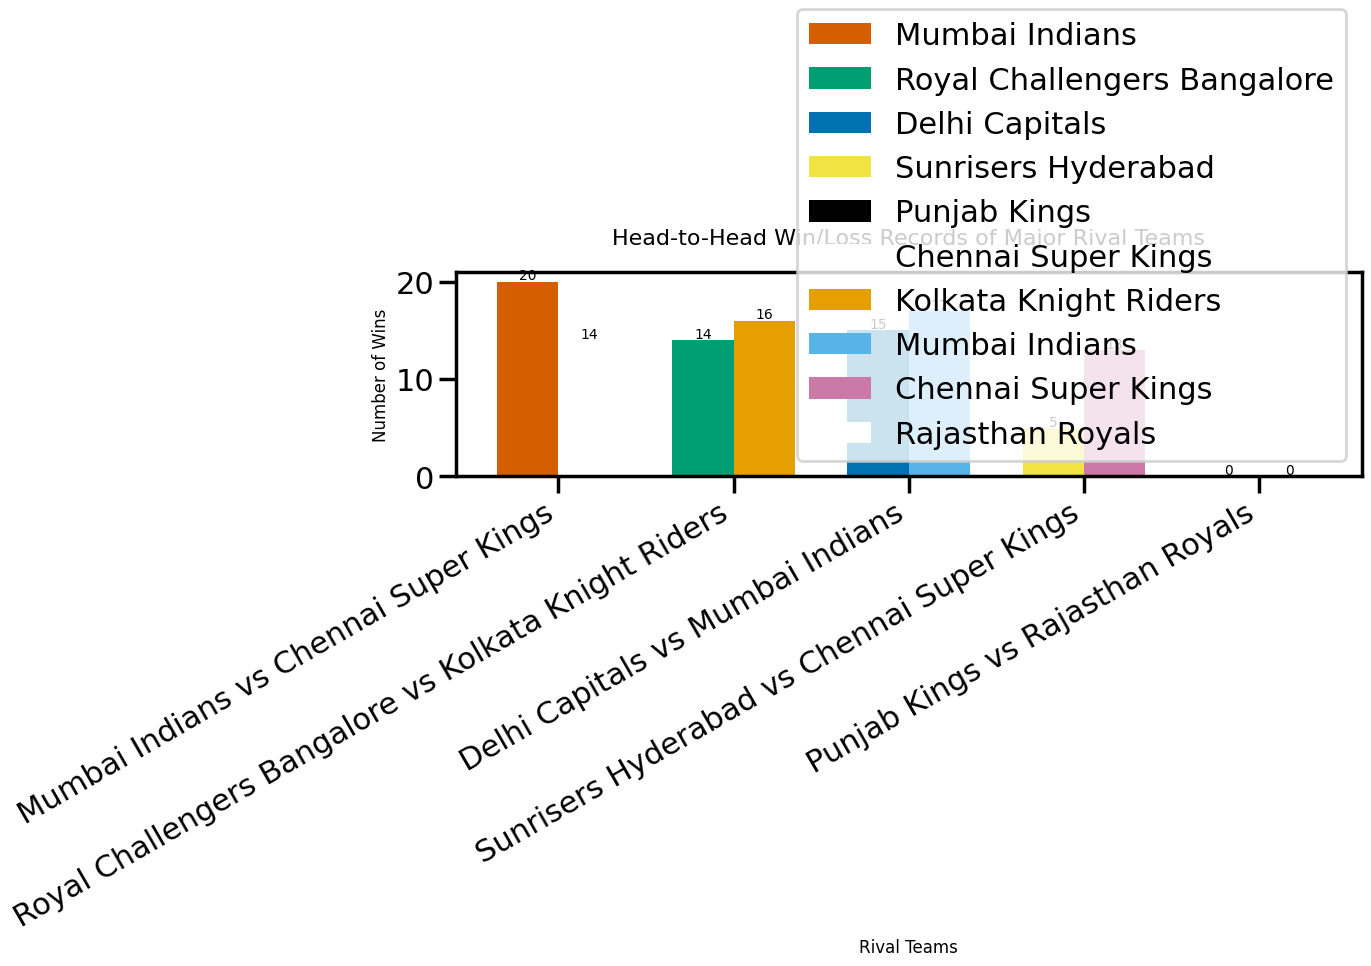

In [82]:
# Load the data
file_path = '/home/ykapil897/dv/lab_1/IPL_Matches_2008_2022.csv'
data = pd.read_csv(file_path)

# Consolidate team names
team_name_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Rising Pune Supergiant': 'Pune Warriors',
    'Rising Pune Supergiants': 'Pune Warriors',
    'Gujarat Lions': 'Gujarat Titans',
    'Punjab Kings': 'Kings XI Punjab'
}

data['Team1'] = data['Team1'].replace(team_name_mapping)
data['Team2'] = data['Team2'].replace(team_name_mapping)
data['WinningTeam'] = data['WinningTeam'].replace(team_name_mapping)

# Define major rival teams
major_rival_teams = [
    ('Mumbai Indians', 'Chennai Super Kings'),
    ('Royal Challengers Bangalore', 'Kolkata Knight Riders'),
    ('Delhi Capitals', 'Mumbai Indians'),
    ('Sunrisers Hyderabad', 'Chennai Super Kings'),
    ('Punjab Kings', 'Rajasthan Royals')
]

# Initialize an empty list to store head-to-head records
head_to_head_records = []

# Calculate head-to-head records for each pair of rival teams
for team1, team2 in major_rival_teams:
    wins_team1 = data[(data['Team1'] == team1) & (data['Team2'] == team2) & (data['WinningTeam'] == team1)].shape[0] + \
                 data[(data['Team1'] == team2) & (data['Team2'] == team1) & (data['WinningTeam'] == team1)].shape[0]
    wins_team2 = data[(data['Team1'] == team1) & (data['Team2'] == team2) & (data['WinningTeam'] == team2)].shape[0] + \
                 data[(data['Team1'] == team2) & (data['Team2'] == team1) & (data['WinningTeam'] == team2)].shape[0]
    head_to_head_records.append({'Team1': team1, 'Team2': team2, 'Wins_Team1': wins_team1, 'Wins_Team2': wins_team2})

# Convert the list to a DataFrame
head_to_head_records_df = pd.DataFrame(head_to_head_records)

# Plotting grouped bar chart using custom colors
plt.figure(figsize=(14, 8))
bar_width = 0.35
index = range(len(head_to_head_records_df))

# Apply custom colors to bars
plt.bar(
    index,
    head_to_head_records_df['Wins_Team1'],
    bar_width,
    color=custom_colors[:len(head_to_head_records_df)],  # Colors for Team1
    label=head_to_head_records_df['Team1']
)

plt.bar(
    [i + bar_width for i in index],
    head_to_head_records_df['Wins_Team2'],
    bar_width,
    color=custom_colors[len(head_to_head_records_df):2*len(head_to_head_records_df)],  # Colors for Team2
    label=head_to_head_records_df['Team2']
)

# Styling the plot
plt.xlabel('Rival Teams', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)
plt.title('Head-to-Head Win/Loss Records of Major Rival Teams', fontsize=16, pad=20)
plt.xticks(
    [i + bar_width / 2 for i in index],
    [f"{row['Team1']} vs {row['Team2']}" for _, row in head_to_head_records_df.iterrows()],
    rotation=30,
    ha='right'
)

# Add annotations on bars
for i, (wins1, wins2) in enumerate(zip(head_to_head_records_df['Wins_Team1'], head_to_head_records_df['Wins_Team2'])):
    plt.text(i, wins1 + 0.2, str(wins1), ha='center', fontsize=10)
    plt.text(i + bar_width, wins2 + 0.2, str(wins2), ha='center', fontsize=10)

# Add legend and display the plot
plt.legend()
plt.tight_layout()
plt.show()
